In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.polynomial import Polynomial
from typing import List

In [12]:
class CurveFitting:
    def __init__(self, xs, ys : List[int]) -> None:
        # Given data
        self.xs = np.array(xs)
        self.ys = np.array(ys)

        # Display
        self.coeff_text = {
            1: '(a, b)', 2: '(a, b, c)', 3: '(a, b, c, d)'}
        self.order_text = {
            1: 'Linear',  2: 'Quadratic ', 3: 'Cubic'}

        # Seaborn styling setup
        sns.set_theme(style="whitegrid")
        self.colors = sns.color_palette("husl", 4)

    def print_props(self, order) -> np.ndarray:  
        # Perform regression using polyfit,
        poly = Polynomial.fit(self.xs, self.ys, deg=order)

        # Convert to standard form and get coefficients
        mC = poly.convert().coef

        print(f'Using Polynomial.fit : {self.order_text[order]}')
        print(f'Coefficients  : {self.coeff_text[order]}:'
            + f'\n\t{mC}\n')

    def calc_plot_all(self) -> None:
        self.x_plot = xp = np.linspace(
            min(self.xs), max(self.xs), 100)

        # Calculate coefficients directly
        self.y1_plot = Polynomial.fit(self.xs, self.ys, deg=1)(xp)
        self.y2_plot = Polynomial.fit(self.xs, self.ys, deg=2)(xp)
        self.y3_plot = Polynomial.fit(self.xs, self.ys, deg=3)(xp)

    def draw_plot(self) -> None:
        plt.figure(figsize=(10, 6))
        
        # Scatter plot with Seaborn color
        sns.scatterplot(
            x=self.xs, y=self.ys, color=self.colors[0], 
            s=100, label='Data points', edgecolor='w', linewidth=0.5)
        
        # Polynomial curves with Seaborn colors
        plt.plot(self.x_plot, self.y1_plot, color=self.colors[1], 
                linewidth=2.5, label='Linear fit')
        plt.plot(self.x_plot, self.y2_plot, color=self.colors[2], 
                linewidth=2.5, label='Quadratic fit')
        plt.plot(self.x_plot, self.y3_plot, color=self.colors[3], 
                linewidth=2.5, label='Cubic fit')

        # Styling
        plt.title('Polynomial Curve Fitting', pad=20)
        plt.xlabel('x', fontsize=12)
        plt.ylabel('y', fontsize=12)
        
        # Legend and grid
        plt.legend(fontsize=10, framealpha=0.9)

        plt.tight_layout()
        plt.show()

    def process(self) -> None:
        self.calc_plot_all()
        self.draw_plot()

        for order in [1, 2, 3]:
            self.print_props(order)

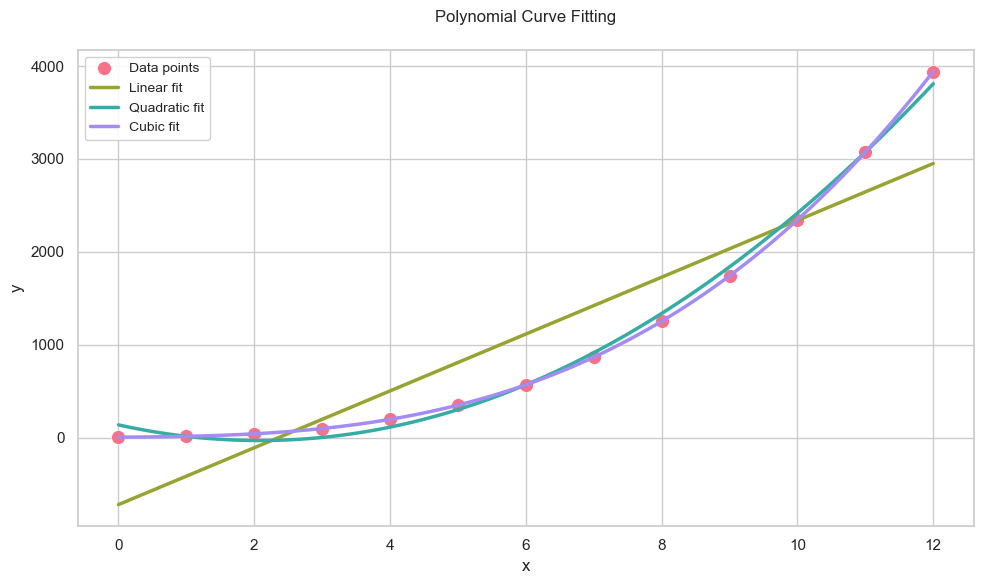

Using Polynomial.fit : Linear
Coefficients  : (a, b):
	[-721.  306.]

Using Polynomial.fit : Quadratic 
Coefficients  : (a, b, c):
	[ 137. -162.   39.]

Using Polynomial.fit : Cubic
Coefficients  : (a, b, c, d):
	[5. 4. 3. 2.]



In [13]:
def main() -> int:
    # Getting Matrix Values
    mCSV = np.genfromtxt("series.csv",
      skip_header=1, delimiter=",", dtype=float)
    mCSVt   = np.transpose(mCSV)

    example = CurveFitting(mCSVt[0], mCSVt[3])
    example.process()

    return 0

if __name__ == "__main__":
    main()